<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Week5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow


In [10]:
# Gambar yang digunakan
imgFemale = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
imgCouple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
imgGalaxy = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Praktikum No 1

1. Buat Gamma Correction

In [11]:
imgNo1 = imgFemale.copy()

In [12]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 7


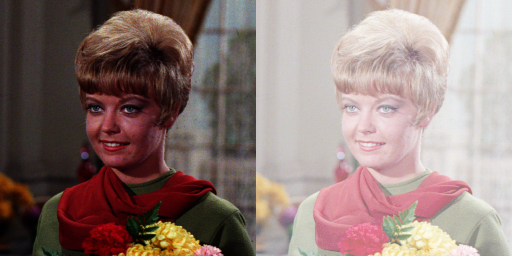

In [13]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gammaInput = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(imgNo1, gamma=gammaInput)
cv2_imshow(np.hstack([imgNo1, adjusted]))

# Praktikum No 2
Simulasi Depth Image

In [14]:
imgNo2 = imgFemale.copy()

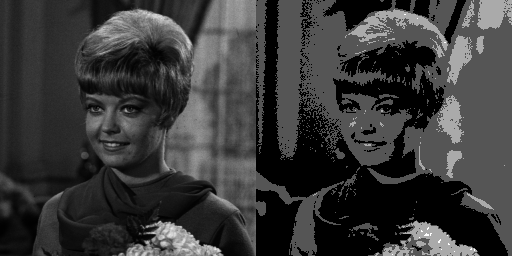

In [15]:
bit_depth = 2
level = (255/(2**(bit_depth)-1))
original = imgNo2.copy()
original = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)

# Praktikum No 3
Modul Average Denoising

In [19]:
import glob
imgNo3 =[]
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  imgNo3.append(n)

In [20]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  denoised_image = np.zeros_like(imgNo3[0], dtype=np.float32)
  for i in range(index):
    denoised_image += imgNo3[i].astype(np.float32)

  return denoised_image


5 Citra di Average

29.135478209434535


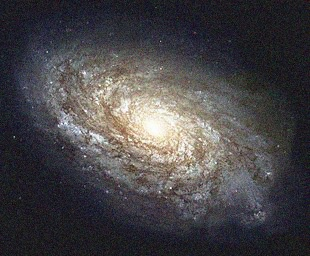

In [21]:
denoised_image_5 = averageDenoising(5)
denoised_image_5 /= 5
denoised_image_5 = np.uint8(denoised_image_5)
print(PNSR(imgNo3[0],denoised_image_5))
cv2_imshow(denoised_image_5)


10 Citra di Average

29.01289304163829


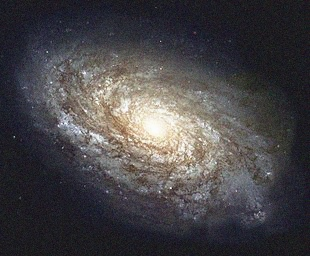

In [22]:
denoised_image_10 = averageDenoising(10)
denoised_image_10 /= 10
denoised_image_10 = np.uint8(denoised_image_10)
print(PNSR(imgNo3[0],denoised_image_10))
cv2_imshow(denoised_image_10)

20 Citra di Average

28.95420432298713


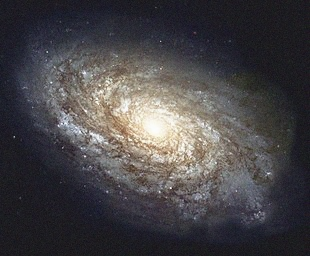

In [23]:
denoised_image_20 = averageDenoising(20)
denoised_image_20 /= 20
denoised_image_20 = np.uint8(denoised_image_20)
print(PNSR(imgNo3[0],denoised_image_20))
cv2_imshow(denoised_image_20)

40 Citra di Average

28.938893834425237


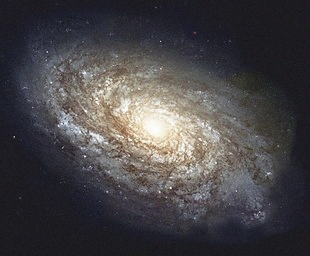

In [24]:
denoised_image_40 = averageDenoising(40)
denoised_image_40 /= 40
denoised_image_40 = np.uint8(denoised_image_40)
print(PNSR(imgNo3[0],denoised_image_40))
cv2_imshow(denoised_image_40)

80 Citra di Average

28.92657248976393


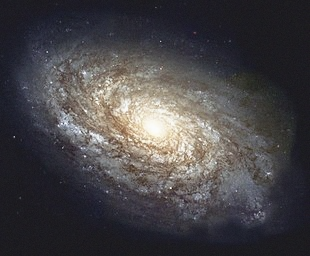

In [25]:
denoised_image_80 = averageDenoising(80)
denoised_image_80 /= 80
denoised_image_80 = np.uint8(denoised_image_80)
print(PNSR(imgNo3[0],denoised_image_80))
cv2_imshow(denoised_image_80)


100 Citra di Average

28.92571787280964


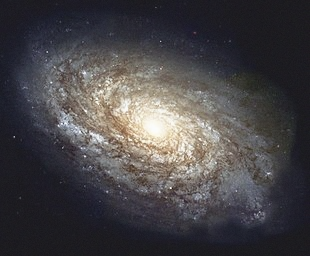

In [27]:
denoised_image_100 = averageDenoising(100)
denoised_image_100 /= 100
denoised_image_100 = np.uint8(denoised_image_100)
print(PNSR(imgNo3[0],denoised_image_100))
cv2_imshow(denoised_image_100)


# Praktikum No 4

Image Masking

In [28]:
imgNo4 = imgCouple.copy()
imgNo4 = cv.cvtColor(imgNo4, cv.COLOR_BGR2RGB)

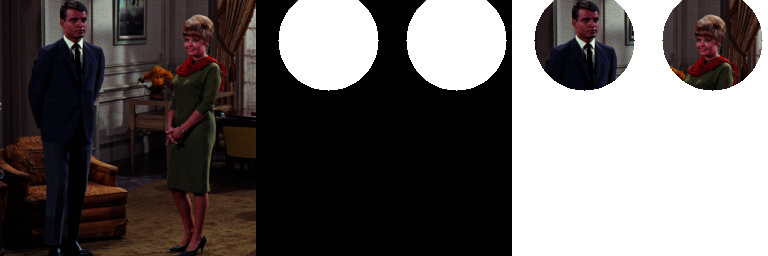

In [29]:
mask = np.zeros(imgNo4.shape, dtype=np.uint8)
mask = cv.circle(mask, (72, 40), 50, (255,255,255), -1)
mask = cv.circle(mask, (200, 40), 50, (255,255,255), -1)

result = cv.bitwise_and(imgNo4, mask)
result[mask==0] = 255

imgNo4 = cv.cvtColor(imgNo4, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(cv.hconcat([imgNo4, mask, result]))

# Praktikum No 5

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

In [30]:
imgNo5 = imgCouple.copy()

# NOT

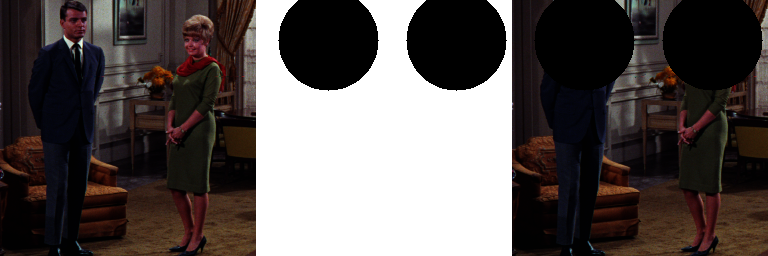

In [31]:
mask_not = np.zeros(imgNo5.shape[:2], dtype=np.uint8)

mask_not = cv.circle(mask_not, (72, 40), 50, 255, -1)
mask_not = cv.circle(mask_not, (200, 40), 50, 255, -1)

combine = cv.bitwise_not(mask_not)

result = cv.bitwise_and(imgNo5, imgNo5, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgNo5, combine, result]))


# OR

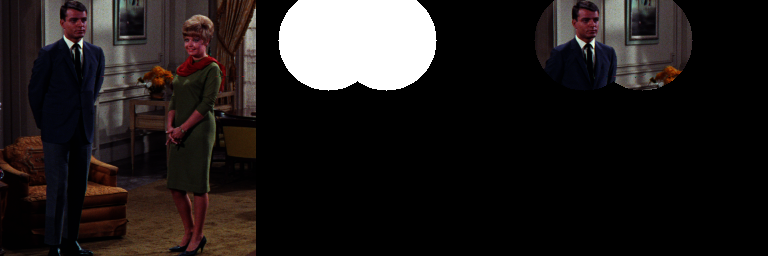

In [32]:
mask_or = np.zeros(imgNo5.shape[:2], dtype=np.uint8)
mask_or2 = np.zeros(imgNo5.shape[:2], dtype=np.uint8)

mask_or = cv.circle(mask_or, (72, 40), 50, 255, -1)
mask_or22 = cv.circle(mask_or2, (130, 40), 50, 255, -1)

combine = cv.bitwise_or(mask_or, mask_or2)
result = cv.bitwise_and(imgNo5, imgNo5, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgNo5, combine, result]))

# AND

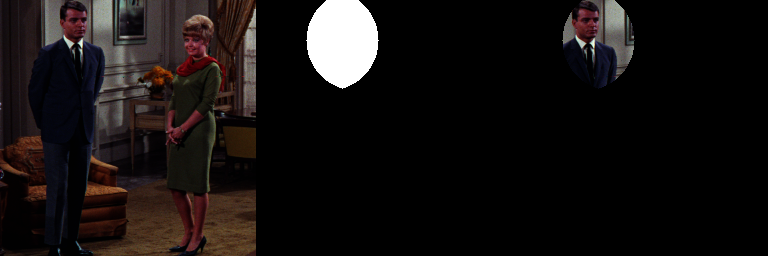

In [33]:
mask_and = np.zeros(imgNo5.shape[:2], dtype=np.uint8)
mask_and2 = np.zeros(imgNo5.shape[:2], dtype=np.uint8)

mask_and = cv.circle(mask_and, (72, 40), 50, 255, -1)
mask_and2 = cv.circle(mask_and2, (100, 40), 50, 255, -1)

combine = cv.bitwise_and(mask_and, mask_and2)

result = cv.bitwise_and(imgNo5, imgNo5, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgNo5, combine, result]))

# NAND

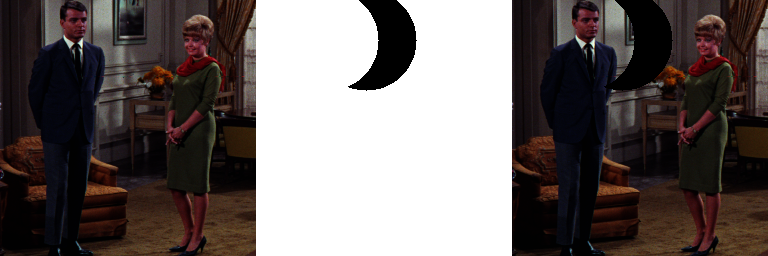

In [35]:
mask_nand = np.zeros(imgNo5.shape[:2], dtype=np.uint8)
mask_nand2 = np.zeros(imgNo5.shape[:2], dtype=np.uint8)


mask_nand = cv.circle(mask_nand, (72, 40), 50, 255, -1)
mask_nand2 = cv.circle(mask_nand2, (110, 40), 50, 255, -1)

combine = cv.bitwise_or(mask_nand, cv.bitwise_not(mask_nand2))

result = cv.bitwise_and(imgNo5, imgNo5, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgNo5, combine, result]))

# XOR

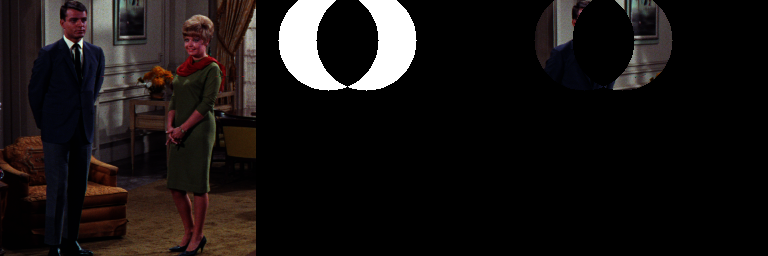

In [36]:
mask_xor = np.zeros(imgNo5.shape[:2], dtype=np.uint8)
mask_xor2 = np.zeros(imgNo5.shape[:2], dtype=np.uint8)

mask_xor = cv.circle(mask_xor, (72, 40), 50, 255, -1)
mask_xor2 = cv.circle(mask_xor2, (110, 40), 50, 255, -1)

combine = cv.bitwise_xor(mask_xor, mask_xor2)

result = cv.bitwise_and(imgNo5, imgNo5, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgNo5, combine, result]))